In [1]:
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1 Load a dataset
newsgroups = datasets.fetch_20newsgroups(subset = 'all', categories = ['alt.atheism', 'sci.space'])

In [3]:
# 2 Get TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(newsgroups.data)

0.5526360264776301
0.5526360264776301
0.5526360264776301
0.5526360264776301
0.9501635290987904
0.9932804406678872
0.9932804406678872
0.9932804406678872
0.9932804406678872
0.9932804406678872
0.9932804406678872


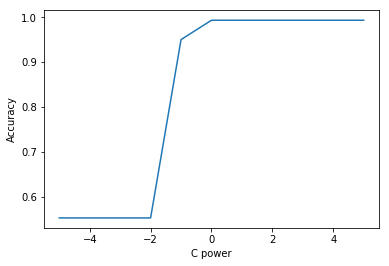

In [4]:
# 3 Find the best C for the SVM model
kf = KFold(n_splits=5, random_state=241, shuffle=True)
C_powers = [p for p in range(-5,6)]
best_score = 0
scores = []
best_p = best_model = None
for p in C_powers:
    svm = SVC(random_state=241, C=10**p, kernel='linear')
    scores.append(cross_val_score(estimator=svm, X=X, y=newsgroups.target, cv=kf, scoring='accuracy').mean())
    if scores[-1] > best_score:
        best_score = scores[-1]
        best_p = p
        best_model = svm
    print(scores[-1])
plt.plot(C_powers, scores)
plt.xlabel('C power')
plt.ylabel('Accuracy')
plt.show()

In [5]:
# 3.1 The same thing using grid
grid = {'C': np.power(10.0, np.arange(-5, 6))}
clf = SVC(kernel='linear', random_state=241)
cv = KFold(n_splits=5, random_state=241, shuffle=True)
gs = GridSearchCV(clf, grid, scoring='accuracy', cv=cv)
gs.fit(X, newsgroups.target)
for a in gs.cv_results_['mean_test_score']:
    print(a)

0.5526315789473685
0.5526315789473685
0.5526315789473685
0.5526315789473685
0.9501679731243001
0.9932810750279956
0.9932810750279956
0.9932810750279956
0.9932810750279956
0.9932810750279956
0.9932810750279956


In [6]:
# 4 Teach the best model
best_model.fit(X, newsgroups.target)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=241,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
# 5 Find the most important words
max_coefs = []
coefs = np.absolute(best_model.coef_.toarray().flatten())
for i in range(10):
    max_coefs.append(coefs.argmax())
    coefs[max_coefs[-1]] = float('-inf')
feature_mapping = vectorizer.get_feature_names()
important_words = []
for i in max_coefs:
    important_words.append(feature_mapping[i])
print(' '.join(sorted(important_words)))

atheism atheists bible god keith moon religion sci sky space
